In [163]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import shapefile as shp
import seaborn as sns
from dbfread import DBF

In [164]:
#pip install jupyterthemes
# jt -r

In [165]:
# Cambiando la ruta de trabajo
path = "C:/Users/user/Google Drive/Semestre 2021-1/Tópicos de Economía Matemática y Computacional/Examen_Parcial"
os.chdir(path)

In [166]:
# CARGA DE BASES DE DATOS
df_REDATAM = pd.read_csv( "PoblacionREDATAM.csv", sep = "," ,encoding = 'latin')
df_positivos = pd.read_csv("positivos_covid.csv", sep = ";" ,encoding = 'UTF-8')
df_vacunas = pd.read_csv("vacunas_covid.csv", sep = "," ,encoding = 'UTF-8')
df_fallecidos = pd.read_csv("fallecidos_covid.csv", sep = ";" ,encoding = 'latin')

In [167]:
df_REDATAM.columns

Index(['Código', 'Código.1', 'POBLACION', 'Departamento ', 'Provincia',
       'Distrito', 'Edad 0', 'Edad 1 año', 'Edad 2 años', 'Edad 3 años',
       ...
       'Edad 107 años', 'Edad 108 años', 'Edad 109 años', 'Edad 110 años',
       'Edad 111 años', 'Edad 112 años', 'Edad 113 años', 'Edad 114 años',
       'Edad 115 años', 'Unnamed: 122'],
      dtype='object', length=123)

In [168]:
df_REDATAM

,Código,Código.1,POBLACION,Departamento,Provincia,Distrito,Edad 0,Edad 1 año,Edad 2 años,Edad 3 años,...,Edad 107 años,Edad 108 años,Edad 109 años,Edad 110 años,Edad 111 años,Edad 112 años,Edad 113 años,Edad 114 años,Edad 115 años,Unnamed: 122
0,10101,10101,32 589,Amazonas,Chachapoyas,Chachapoyas,528,510,515,517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,10102,10102,262,Amazonas,Chachapoyas,Asuncion,6,3,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,10103,10103,1 136,Amazonas,Chachapoyas,Balsas,21,25,24,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,10104,10104,642,Amazonas,Chachapoyas,Cheto,13,9,8,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,10105,10105,585,Amazonas,Chachapoyas,Chiliquin,8,8,12,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,TOTAL,TOTAL,29 381 884,NaN,NaN,NaN,456 360,475 716,503 748,524 181,...,68.0,32.0,26.0,25.0,11.0,12.0,7.0,2.0,9.0,NaN
1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
df_REDATAM=df_REDATAM.drop(range(1874,1879),axis=0)

In [170]:
df_REDATAM.drop(df_REDATAM.iloc[:, 6:123], inplace=True, axis=1)

In [171]:
df_REDATAM

,Código,Código.1,POBLACION,Departamento,Provincia,Distrito
0,10101,10101,32 589,Amazonas,Chachapoyas,Chachapoyas
1,10102,10102,262,Amazonas,Chachapoyas,Asuncion
2,10103,10103,1 136,Amazonas,Chachapoyas,Balsas
3,10104,10104,642,Amazonas,Chachapoyas,Cheto
4,10105,10105,585,Amazonas,Chachapoyas,Chiliquin
...,...,...,...,...,...,...
1869,250302,250302,10 214,Ucayali,Padre Abad,Irazola
1870,250303,250303,7 722,Ucayali,Padre Abad,Curimana
1871,250304,250304,7 594,Ucayali,Padre Abad,Neshuya
1872,250305,250305,5 137,Ucayali,Padre Abad,Alexander Von Humboldt


In [172]:
df_REDATAM = df_REDATAM.rename(columns={'Departamento ':'DEPARTAMENTO',
                                   'Provincia':'PROVINCIA','Distrito':'DISTRITO'})

# Cambiando los datos de las variables a mayúsculas
df_REDATAM['DEPARTAMENTO'] = df_REDATAM['DEPARTAMENTO'].str.upper()
df_REDATAM['PROVINCIA'] = df_REDATAM['PROVINCIA'].str.upper()
df_REDATAM['DISTRITO'] = df_REDATAM['DISTRITO'].str.upper()
df_REDATAM
#df_vacunas['DEPARTAMENTO'].dtypes

,Código,Código.1,POBLACION,DEPARTAMENTO,PROVINCIA,DISTRITO
0,10101,10101,32 589,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS
1,10102,10102,262,AMAZONAS,CHACHAPOYAS,ASUNCION
2,10103,10103,1 136,AMAZONAS,CHACHAPOYAS,BALSAS
3,10104,10104,642,AMAZONAS,CHACHAPOYAS,CHETO
4,10105,10105,585,AMAZONAS,CHACHAPOYAS,CHILIQUIN
...,...,...,...,...,...,...
1869,250302,250302,10 214,UCAYALI,PADRE ABAD,IRAZOLA
1870,250303,250303,7 722,UCAYALI,PADRE ABAD,CURIMANA
1871,250304,250304,7 594,UCAYALI,PADRE ABAD,NESHUYA
1872,250305,250305,5 137,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT


In [173]:
df_REDATAM['POBLACION']= df_REDATAM['POBLACION'].str.replace(" ", "")
df_REDATAM['POBLACION']=df_REDATAM['POBLACION'].astype(float)

In [174]:
df_REDATAM= df_REDATAM[['Código','Código.1','DEPARTAMENTO','PROVINCIA','DISTRITO','POBLACION']]


In [175]:
df_positivos.columns

Index(['FECHA_CORTE', 'UUID', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'METODODX', 'EDAD', 'SEXO', 'FECHA_RESULTADO'],
      dtype='object')

In [176]:
df_positivos['INDICADOR_POSITIVOS']=1

In [177]:
df_positivos.head()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,INDICADOR_POSITIVOS
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,20200329.0,1
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,20200330.0,1
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,20200330.0,1
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,20200330.0,1
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,20200330.0,1


In [178]:
df_positivos1 = df_positivos.groupby(['DEPARTAMENTO','PROVINCIA','DISTRITO']).agg( 
    {'INDICADOR_POSITIVOS':['sum']} ).reset_index()
df_positivos1

,DEPARTAMENTO,PROVINCIA,DISTRITO,INDICADOR_POSITIVOS
,,,,sum
0,AMAZONAS,BAGUA,ARAMANGO,3519
1,AMAZONAS,BAGUA,BAGUA,2515
2,AMAZONAS,BAGUA,COPALLIN,250
3,AMAZONAS,BAGUA,EL PARCO,102
4,AMAZONAS,BAGUA,IMAZA,2300
...,...,...,...,...
1864,UCAYALI,PADRE ABAD,CURIMANA,318
1865,UCAYALI,PADRE ABAD,IRAZOLA,401
1866,UCAYALI,PADRE ABAD,NESHUYA,291


In [179]:
df_positivos1.columns

MultiIndex([(       'DEPARTAMENTO',    ''),
            (          'PROVINCIA',    ''),
            (           'DISTRITO',    ''),
            ('INDICADOR_POSITIVOS', 'sum')],
           )

In [180]:
df_positivos1.columns = ["DEPARTAMENTO","PROVINCIA","DISTRITO","Cantidad_positivos"]
df_positivos1
# df_positivos1['Cantidad_positivos'].describe()

,DEPARTAMENTO,PROVINCIA,DISTRITO,Cantidad_positivos
0,AMAZONAS,BAGUA,ARAMANGO,3519
1,AMAZONAS,BAGUA,BAGUA,2515
2,AMAZONAS,BAGUA,COPALLIN,250
3,AMAZONAS,BAGUA,EL PARCO,102
4,AMAZONAS,BAGUA,IMAZA,2300
...,...,...,...,...
1864,UCAYALI,PADRE ABAD,CURIMANA,318
1865,UCAYALI,PADRE ABAD,IRAZOLA,401
1866,UCAYALI,PADRE ABAD,NESHUYA,291
1867,UCAYALI,PADRE ABAD,PADRE ABAD,1629


In [181]:
df_vacunas.columns

Index(['FECHA_CORTE', 'UUID', 'GRUPO_RIESGO', 'EDAD', 'SEXO',
       'FECHA_VACUNACION', 'DOSIS', 'FABRICANTE', 'DIRESA', 'DEPARTAMENTO',
       'PROVINCIA', 'DISTRITO'],
      dtype='object')

In [182]:
# ¿Cómo borrar duplicados de manera selectiva? O sea solo quedarme con los que tienen dosis 1
# drop_duplicates('DOSIS',keep='last')

In [183]:
df_vacunas.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO
0,20210524,04cd9264959046894f4235d5c8b62794,PERSONAL DE SALUD,NaN,MASCULINO,20210222,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LA VICTORIA
1,20210524,14fd8ec748ba82a72a4c5556ee8e6372,PERSONAL DE SALUD,NaN,MASCULINO,20210310,1,SINOPHARM,LA LIBERTAD,LA LIBERTAD,TRUJILLO,VICTOR LARCO HERRERA
2,20210524,b17ceddbbde5df1c082e09dc076421fb,PERSONAL DE SALUD,NaN,MASCULINO,20210227,1,SINOPHARM,HUANUCO,HUANUCO,LEONCIO PRADO,RUPA-RUPA
3,20210524,e5e67a589a53167d365e3de4373c419d,ADULTO MAYOR,NaN,FEMENINO,20210417,1,PFIZER,LIMA SUR,LIMA,LIMA,CHORRILLOS
4,20210524,103ae79bc8e63d82e78c754ae5c78e75,ADULTO MAYOR,81.0,FEMENINO,20210422,1,ASTRAZENECA,UCAYALI,UCAYALI,CORONEL PORTILLO,CALLERIA


In [184]:
df_vacunas=df_vacunas.sort_values(by=['FECHA_VACUNACION'])
df_vacunas2= df_vacunas.copy()
df_vacunas=df_vacunas.drop_duplicates('UUID',keep='first')
df_vacunas['INDICADOR_VACUNADOS']=1
df_vacunas.shape

(2277997, 13)

A pesar del ordenamiento por fecha de vacunación y quedándonos solo con las primeras dosis, obtenemos que hay personas que en la variable 'DOSIS' tienen el número 2, por lo que es un indicio de algún error. Puede ser que se registró mal el número de dosis y en vez de 2 sea dosis 1, ya que es improbable que alguien haya recibido la dosis 2 sin la primera o, también puede ser que no se registró la primera dosis.

In [185]:
df_vacunas.head()

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,FABRICANTE,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,INDICADOR_VACUNADOS
1234535,20210524,a362cd4ed2ff2cbf5e03472b18d5bfd0,PERSONAL DE SALUD,55.0,MASCULINO,20210209,1,SINOPHARM,AYACUCHO,AYACUCHO,HUAMANGA,AYACUCHO,1
1795869,20210524,47d7f2b1985ce08ea4065ed0405c9390,PERSONAL DE SALUD,52.0,MASCULINO,20210209,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LIMA,1
124986,20210524,46865021b0c69f260a320b27480c9d20,PERSONAL DE SALUD,27.0,MASCULINO,20210209,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LIMA,1
2205648,20210524,28bfd067a46cae2e9d50a371866cbb6d,PERSONAL DE SALUD,51.0,FEMENINO,20210209,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,LIMA,1
1795983,20210524,e4b2bbe4f0d202a441f6cb1339549370,PERSONAL DE SALUD,46.0,FEMENINO,20210209,1,SINOPHARM,LIMA CENTRO,LIMA,LIMA,BREÑA,1


In [186]:
df_vacunas.dtypes

FECHA_CORTE              int64
UUID                    object
GRUPO_RIESGO            object
EDAD                   float64
SEXO                    object
FECHA_VACUNACION         int64
DOSIS                    int64
FABRICANTE              object
DIRESA                  object
DEPARTAMENTO            object
PROVINCIA               object
DISTRITO                object
INDICADOR_VACUNADOS      int64
dtype: object

In [187]:
df_vacunas['DOSIS'].value_counts()

1    2277476
2        521
Name: DOSIS, dtype: int64

In [188]:
df_vacunas['INDICADOR_VACUNADOS'].value_counts()

1    2277997
Name: INDICADOR_VACUNADOS, dtype: int64

In [189]:
# ¿Se puede usar pivot_table con varias variables aparte de UUID?--> SÍ SE PUEDE 
# dups_IDPOS= data_POS.pivot_table(index=['UUID'],aggfunc='size')

In [190]:
df_vacunados1 = df_vacunas.groupby(['DEPARTAMENTO','PROVINCIA','DISTRITO']).agg( 
    {'INDICADOR_VACUNADOS':['sum']} ).reset_index()
df_vacunados1.columns

MultiIndex([(       'DEPARTAMENTO',    ''),
            (          'PROVINCIA',    ''),
            (           'DISTRITO',    ''),
            ('INDICADOR_VACUNADOS', 'sum')],
           )

In [191]:
df_vacunados1.columns = ["DEPARTAMENTO","PROVINCIA","DISTRITO","Cantidad_vacunados"]
df_vacunados1

,DEPARTAMENTO,PROVINCIA,DISTRITO,Cantidad_vacunados
0,AMAZONAS,BAGUA,ARAMANGO,420
1,AMAZONAS,BAGUA,BAGUA,2850
2,AMAZONAS,BAGUA,COPALLIN,201
3,AMAZONAS,BAGUA,EL PARCO,87
4,AMAZONAS,BAGUA,IMAZA,501
...,...,...,...,...
1660,UCAYALI,PADRE ABAD,CURIMANA,331
1661,UCAYALI,PADRE ABAD,IRAZOLA,402
1662,UCAYALI,PADRE ABAD,NESHUYA,347
1663,UCAYALI,PADRE ABAD,PADRE ABAD,1325


In [192]:
# df_vacunados1['Cantidad_vacunados'].isnull().sum(axis=0)

In [193]:
df_fallecidos['INDICADOR_FALLECIDOS']=1
df_fallecidos.columns

Index(['FECHA_CORTE', 'UUID', 'FECHA_FALLECIMIENTO', 'EDAD_DECLARADA', 'SEXO',
       'CLASIFICACION_DEF', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'INDICADOR_FALLECIDOS'],
      dtype='object')

In [194]:
#boolean = df_vacunas.duplicated(subset=['DEPARTAMENTO','PROVINCIA','DISTRITO']).any()
#boolean # True: sí hay duplicados

#boolean1 = df_REDATAM.duplicated(subset=['Departamento ','Provincia','Distrito']).any()
#boolean1

#boolean2 = df_positivos.duplicated(subset=['DEPARTAMENTO','PROVINCIA','DISTRITO']).any()
#boolean2

OTRA MANERA DE VER DUPLICADOS

In [195]:
d5 = df_positivos.pivot_table(index=['UUID'], aggfunc='size')
(d5.min(),d5.max())
# La base de positivos está a nivel individual y sin duplicados

(1, 1)

In [196]:
d2 = df_REDATAM.pivot_table(index=['DEPARTAMENTO','PROVINCIA','DISTRITO'], aggfunc='size')
(d2.min(),d2.max())
# Entonces la base REDATAM está a nivel de distrito y sin duplicados

(1, 1)

In [197]:
d6 = df_vacunas.pivot_table(index=['UUID'], aggfunc='size')
(d6.min(),d6.max())

(1, 1)

In [198]:
# del d1,d2,d3,boolean,boolean1,boolean2

In [199]:
df_positivos1.shape

(1869, 4)

In [200]:
df_vacunados1.shape

(1665, 4)

In [201]:
df_REDATAM.shape

(1874, 6)

In [202]:
# Esto no es exacto porque sale true y debería salir false
#boolean5 = df_REDATAM.duplicated(subset=['Código','Departamento ','Provincia','Distrito']).any()
#boolean

Empezamos haciendo el merge con las bases de vacunados y positivos. En este caso, la base x es la base vacunados

In [203]:
# sum(dataCruce1['DEPARTAMENTO_x']==dataCruce1['DEPARTAMENTO_y'])

##### PREGUNTA 1

In [204]:
dataCruce10=pd.merge(df_REDATAM,df_vacunados1,how='left',left_on=['DEPARTAMENTO','PROVINCIA','DISTRITO'], right_on=['DEPARTAMENTO','PROVINCIA','DISTRITO'])
dataCruce11=pd.merge(dataCruce10,df_positivos1,how='left',left_on=['DEPARTAMENTO','PROVINCIA','DISTRITO'], right_on=['DEPARTAMENTO','PROVINCIA','DISTRITO'])
#dataCruce11.drop(dataCruce11.iloc[:, 6:123], inplace=True, axis=1)
#dataCruce11=dataCruce11.drop(range(1874,1879),axis=0)
dataCruce11

,Código,Código.1,DEPARTAMENTO,PROVINCIA,DISTRITO,POBLACION,Cantidad_vacunados,Cantidad_positivos
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,32589.0,6047.0,5207.0
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,262.0,42.0,4.0
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,1136.0,51.0,84.0
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,642.0,43.0,14.0
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,585.0,62.0,5.0
...,...,...,...,...,...,...,...,...
1869,250302,250302,UCAYALI,PADRE ABAD,IRAZOLA,10214.0,402.0,401.0
1870,250303,250303,UCAYALI,PADRE ABAD,CURIMANA,7722.0,331.0,318.0
1871,250304,250304,UCAYALI,PADRE ABAD,NESHUYA,7594.0,347.0,291.0
1872,250305,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,5137.0,NaN,57.0


In [205]:
dataCruce10.isnull().sum(axis=0)

Código                  0
Código.1                0
DEPARTAMENTO            0
PROVINCIA               0
DISTRITO                0
POBLACION               0
Cantidad_vacunados    233
dtype: int64

### Pregunta 2

##### Estadísticos principales

In [206]:
from scipy.stats import mode 
from scipy import stats

In [207]:
def IQR(x):
    return x.quantile(0.75)-x.quantile(0.25)

In [208]:
import statistics as stat

In [209]:
def Moda(x):
    return stat.mode(x)

In [210]:
df_positivos2 = df_positivos[["DEPARTAMENTO","PROVINCIA","DISTRITO","SEXO","EDAD"]].groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","SEXO"]).agg({"EDAD": ["median","mean","max","min",mode,pd.Series.mode,IQR,Moda]})
df_positivos2.columns = ["median","mean","max","min","mode","moda1","Rango intercuantil","moda2"]
df_positivos2 = df_positivos2.reset_index()

In [211]:
df_positivos2

,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,median,mean,max,min,mode,moda1,Rango intercuantil,moda2
0,AMAZONAS,BAGUA,ARAMANGO,FEMENINO,42.0,41.927291,100.0,0.0,"([50.0], [48])",50.0,31.00,50.0
1,AMAZONAS,BAGUA,ARAMANGO,MASCULINO,42.0,41.816678,99.0,0.0,"([49.0], [33])","[49.0, 50.0]",33.00,49.0
2,AMAZONAS,BAGUA,BAGUA,FEMENINO,37.0,39.225490,90.0,0.0,"([33.0], [38])",33.0,24.00,33.0
3,AMAZONAS,BAGUA,BAGUA,MASCULINO,39.0,41.319132,101.0,0.0,"([32.0], [38])",32.0,27.00,32.0
4,AMAZONAS,BAGUA,COPALLIN,FEMENINO,38.0,40.578512,92.0,0.0,"([30.0], [5])",30.0,29.00,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3692,UCAYALI,PADRE ABAD,NESHUYA,MASCULINO,45.0,43.435897,85.0,0.0,"([27.0], [5])","[27.0, 30.0, 51.0]",28.00,27.0
3693,UCAYALI,PADRE ABAD,PADRE ABAD,FEMENINO,35.0,37.215205,90.0,0.0,"([25.0], [28])","[25.0, 35.0]",26.00,25.0
3694,UCAYALI,PADRE ABAD,PADRE ABAD,MASCULINO,39.0,39.270026,92.0,0.0,"([55.0], [20])",55.0,29.75,55.0
3695,UCAYALI,PURUS,PURUS,FEMENINO,40.0,39.698276,82.0,1.0,"([41.0], [13])",41.0,23.00,41.0


In [212]:
# f=df_positivos1['mode'].to_frame()

#### Proporción de la población que ha sido identificada como contagiada, según método (tipo de prueba), a nivel distrital

In [213]:
df_positivos

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,INDICADOR_POSITIVOS
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,PR,35.0,FEMENINO,20200329.0,1
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,PR,36.0,MASCULINO,20200330.0,1
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,PR,1.0,FEMENINO,20200330.0,1
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,PR,65.0,FEMENINO,20200330.0,1
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,PR,32.0,FEMENINO,20200330.0,1
...,...,...,...,...,...,...,...,...,...,...
1925284,20210522,a378ac0475be8f329e441b03925c3875,LIMA,LIMA,SANTIAGO DE SURCO,PCR,19.0,MASCULINO,20210312.0,1
1925285,20210522,054ff42e57fa14dde9fa358e2db09904,LIMA,LIMA,SANTIAGO DE SURCO,PCR,18.0,MASCULINO,20210315.0,1
1925286,20210522,37a76171c090ae005a89b941a83edcb1,LIMA,LIMA,SANTIAGO DE SURCO,PCR,18.0,MASCULINO,20210316.0,1
1925287,20210522,097188129f19357df09f0b1bdfc600c0,LIMA,LIMA,SANTIAGO DE SURCO,PCR,18.0,MASCULINO,20210318.0,1


In [214]:
df_positivos = pd.get_dummies(df_positivos, columns = ['METODODX'])
df_positivos

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,SEXO,FECHA_RESULTADO,INDICADOR_POSITIVOS,METODODX_AG,METODODX_PCR,METODODX_PR
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,35.0,FEMENINO,20200329.0,1,0,0,1
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,36.0,MASCULINO,20200330.0,1,0,0,1
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,1.0,FEMENINO,20200330.0,1,0,0,1
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,65.0,FEMENINO,20200330.0,1,0,0,1
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,32.0,FEMENINO,20200330.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1925284,20210522,a378ac0475be8f329e441b03925c3875,LIMA,LIMA,SANTIAGO DE SURCO,19.0,MASCULINO,20210312.0,1,0,1,0
1925285,20210522,054ff42e57fa14dde9fa358e2db09904,LIMA,LIMA,SANTIAGO DE SURCO,18.0,MASCULINO,20210315.0,1,0,1,0
1925286,20210522,37a76171c090ae005a89b941a83edcb1,LIMA,LIMA,SANTIAGO DE SURCO,18.0,MASCULINO,20210316.0,1,0,1,0
1925287,20210522,097188129f19357df09f0b1bdfc600c0,LIMA,LIMA,SANTIAGO DE SURCO,18.0,MASCULINO,20210318.0,1,0,1,0


In [215]:
df_positivos_consolidado = df_positivos.groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO"]).agg( 
    {'METODODX_AG':['sum'],
     'METODODX_PCR':['sum'],'METODODX_PR':['sum']}).reset_index()
df_positivos_consolidado.columns = ["DEPARTAMENTO","PROVINCIA","DISTRITO","METODO AG","METODO PCR","METODO PR"]
df_positivos_consolidado

,DEPARTAMENTO,PROVINCIA,DISTRITO,METODO AG,METODO PCR,METODO PR
0,AMAZONAS,BAGUA,ARAMANGO,147.0,31.0,3341.0
1,AMAZONAS,BAGUA,BAGUA,570.0,786.0,1159.0
2,AMAZONAS,BAGUA,COPALLIN,129.0,47.0,74.0
3,AMAZONAS,BAGUA,EL PARCO,18.0,7.0,77.0
4,AMAZONAS,BAGUA,IMAZA,114.0,55.0,2131.0
...,...,...,...,...,...,...
1864,UCAYALI,PADRE ABAD,CURIMANA,100.0,3.0,215.0
1865,UCAYALI,PADRE ABAD,IRAZOLA,65.0,0.0,336.0
1866,UCAYALI,PADRE ABAD,NESHUYA,99.0,1.0,191.0
1867,UCAYALI,PADRE ABAD,PADRE ABAD,331.0,10.0,1288.0


In [216]:
positivos_consolidado=pd.merge(df_REDATAM,df_positivos_consolidado,how='left',left_on=['DEPARTAMENTO','PROVINCIA','DISTRITO'], right_on=['DEPARTAMENTO','PROVINCIA','DISTRITO'])

In [217]:
positivos_consolidado

,Código,Código.1,DEPARTAMENTO,PROVINCIA,DISTRITO,POBLACION,METODO AG,METODO PCR,METODO PR
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,32589.0,1380.0,1810.0,2017.0
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,262.0,0.0,0.0,4.0
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,1136.0,36.0,13.0,35.0
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,642.0,6.0,0.0,8.0
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,585.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1869,250302,250302,UCAYALI,PADRE ABAD,IRAZOLA,10214.0,65.0,0.0,336.0
1870,250303,250303,UCAYALI,PADRE ABAD,CURIMANA,7722.0,100.0,3.0,215.0
1871,250304,250304,UCAYALI,PADRE ABAD,NESHUYA,7594.0,99.0,1.0,191.0
1872,250305,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,5137.0,13.0,0.0,44.0


In [218]:
positivos_consolidado.columns

Index(['Código', 'Código.1', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'POBLACION', 'METODO AG', 'METODO PCR', 'METODO PR'],
      dtype='object')

In [219]:
#PARTEB = data_POS.groupby(['DEPARTAMENTO','PROVINCIA','DISTRITO','METODODX'], as_index=False)['CANTIDAD'].sum()
#PARTEB

In [220]:
positivos_consolidado['% METODO AG']=positivos_consolidado['METODO AG']/positivos_consolidado['POBLACION']
positivos_consolidado['% METODO PCR']=positivos_consolidado['METODO PCR']/positivos_consolidado['POBLACION']
positivos_consolidado['% METODO PR']=positivos_consolidado['METODO PR']/positivos_consolidado['POBLACION']

In [221]:
positivos_consolidado

,Código,Código.1,DEPARTAMENTO,PROVINCIA,DISTRITO,POBLACION,METODO AG,METODO PCR,METODO PR,% METODO AG,% METODO PCR,% METODO PR
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,32589.0,1380.0,1810.0,2017.0,0.042346,0.055540,0.061892
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,262.0,0.0,0.0,4.0,0.000000,0.000000,0.015267
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,1136.0,36.0,13.0,35.0,0.031690,0.011444,0.030810
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,642.0,6.0,0.0,8.0,0.009346,0.000000,0.012461
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,585.0,4.0,0.0,1.0,0.006838,0.000000,0.001709
...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,250302,UCAYALI,PADRE ABAD,IRAZOLA,10214.0,65.0,0.0,336.0,0.006364,0.000000,0.032896
1870,250303,250303,UCAYALI,PADRE ABAD,CURIMANA,7722.0,100.0,3.0,215.0,0.012950,0.000389,0.027843
1871,250304,250304,UCAYALI,PADRE ABAD,NESHUYA,7594.0,99.0,1.0,191.0,0.013037,0.000132,0.025151
1872,250305,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,5137.0,13.0,0.0,44.0,0.002531,0.000000,0.008565


#### Cantidad de población que ha sido vacunada según tipo de fabricante de la vacuna

In [222]:
df_vacunas.columns

Index(['FECHA_CORTE', 'UUID', 'GRUPO_RIESGO', 'EDAD', 'SEXO',
       'FECHA_VACUNACION', 'DOSIS', 'FABRICANTE', 'DIRESA', 'DEPARTAMENTO',
       'PROVINCIA', 'DISTRITO', 'INDICADOR_VACUNADOS'],
      dtype='object')

In [223]:
df_vacunas = pd.get_dummies(df_vacunas, columns = ['FABRICANTE'])

In [224]:
df_vacunas

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,INDICADOR_VACUNADOS,FABRICANTE_ASTRAZENECA,FABRICANTE_PFIZER,FABRICANTE_SINOPHARM
1234535,20210524,a362cd4ed2ff2cbf5e03472b18d5bfd0,PERSONAL DE SALUD,55.0,MASCULINO,20210209,1,AYACUCHO,AYACUCHO,HUAMANGA,AYACUCHO,1,0,0,1
1795869,20210524,47d7f2b1985ce08ea4065ed0405c9390,PERSONAL DE SALUD,52.0,MASCULINO,20210209,1,LIMA CENTRO,LIMA,LIMA,LIMA,1,0,0,1
124986,20210524,46865021b0c69f260a320b27480c9d20,PERSONAL DE SALUD,27.0,MASCULINO,20210209,1,LIMA CENTRO,LIMA,LIMA,LIMA,1,0,0,1
2205648,20210524,28bfd067a46cae2e9d50a371866cbb6d,PERSONAL DE SALUD,51.0,FEMENINO,20210209,1,LIMA CENTRO,LIMA,LIMA,LIMA,1,0,0,1
1795983,20210524,e4b2bbe4f0d202a441f6cb1339549370,PERSONAL DE SALUD,46.0,FEMENINO,20210209,1,LIMA CENTRO,LIMA,LIMA,BREÑA,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999112,20210524,81e3ddea89313b38d562630b0711d922,ADULTO MAYOR,68.0,FEMENINO,20210524,1,ICA,ICA,CHINCHA,PUEBLO NUEVO,1,0,1,0
926199,20210524,e96e04bb4c3581f129795ff978c17522,ADULTO MAYOR,66.0,MASCULINO,20210524,1,CALLAO,CALLAO,CALLAO,VENTANILLA,1,0,1,0
1999108,20210524,0607cc30a9a07169cc7d80222f3eef46,ADULTO MAYOR,65.0,MASCULINO,20210524,1,ICA,ICA,CHINCHA,PUEBLO NUEVO,1,0,1,0
1999123,20210524,836512e3213f61decaef2ca56f5038f8,ADULTO MAYOR,66.0,MASCULINO,20210524,1,ICA,ICA,CHINCHA,PUEBLO NUEVO,1,0,1,0


In [225]:
df_vacunas_consolidado = df_vacunas.groupby(["DEPARTAMENTO","PROVINCIA","DISTRITO","EDAD","SEXO"]).agg( 
    {'FABRICANTE_ASTRAZENECA':['sum'],
     'FABRICANTE_PFIZER':['sum'],'FABRICANTE_SINOPHARM':['sum']}).reset_index()
df_vacunas_consolidado

,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,SEXO,FABRICANTE_ASTRAZENECA,FABRICANTE_PFIZER,FABRICANTE_SINOPHARM
,,,,,,sum,sum,sum
0,AMAZONAS,BAGUA,ARAMANGO,19.0,FEMENINO,1.0,0.0,0.0
1,AMAZONAS,BAGUA,ARAMANGO,22.0,FEMENINO,0.0,0.0,1.0
2,AMAZONAS,BAGUA,ARAMANGO,24.0,FEMENINO,0.0,0.0,2.0
3,AMAZONAS,BAGUA,ARAMANGO,24.0,MASCULINO,0.0,0.0,1.0
4,AMAZONAS,BAGUA,ARAMANGO,25.0,FEMENINO,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...
102293,UCAYALI,PURUS,PURUS,76.0,MASCULINO,2.0,0.0,0.0
102294,UCAYALI,PURUS,PURUS,77.0,MASCULINO,1.0,0.0,0.0
102295,UCAYALI,PURUS,PURUS,80.0,MASCULINO,1.0,0.0,0.0


In [226]:
df_vacunas_consolidado.isnull().sum(axis = 0)
df_vacunas.isnull().sum(axis=0)
# Se pierden datos

FECHA_CORTE                   0
UUID                          0
GRUPO_RIESGO                  0
EDAD                      74280
SEXO                          0
FECHA_VACUNACION              0
DOSIS                         0
DIRESA                        0
DEPARTAMENTO                  0
PROVINCIA                     0
DISTRITO                      0
INDICADOR_VACUNADOS           0
FABRICANTE_ASTRAZENECA        0
FABRICANTE_PFIZER             0
FABRICANTE_SINOPHARM          0
dtype: int64

Debido a que existen missing en edad, no se considera a esas personas para el conteo por tipo de vacuna, es decir, puede ser que haya personas, cuya edad no esté registrada, pero sí hayan recibido la dosis de alguna vacuna

### PREGUNTA 3

#### Evolución de infectados

In [227]:
df_positivos.head()

,FECHA_CORTE,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,SEXO,FECHA_RESULTADO,INDICADOR_POSITIVOS,METODODX_AG,METODODX_PCR,METODODX_PR
0,20210522,7320cabdc1aaca6c59014cae76a134e6,LAMBAYEQUE,FERREÑAFE,FERREÑAFE,35.0,FEMENINO,20200329.0,1,0,0,1
1,20210522,e81602051997ace8340bb8c18fe24c65,LIMA,LIMA,CHORRILLOS,36.0,MASCULINO,20200330.0,1,0,0,1
2,20210522,cecdbf10074dbc011ae05b3cbd320a6f,LIMA,LIMA,LIMA,1.0,FEMENINO,20200330.0,1,0,0,1
3,20210522,71ecb6bccb248b0bb2ac72ed51b5e979,LIMA,LIMA,LIMA,65.0,FEMENINO,20200330.0,1,0,0,1
4,20210522,566af4276cbe9359abe93f9aa86396c3,LIMA,LIMA,LIMA,32.0,FEMENINO,20200330.0,1,0,0,1


In [228]:
df_positivos["FECHA"] =  pd.to_datetime( df_positivos["FECHA_RESULTADO"],
                                         format= '%Y%m%d', errors = "coerce")

In [229]:
x=df_positivos.groupby(['FECHA'])['INDICADOR_POSITIVOS'].sum()
POSITIVOS_DIA=pd.DataFrame({'DIA':x.index, 'POS_DIA':x.values})
POSITIVOS_DIA

,DIA,POS_DIA
0,2020-03-06,1
1,2020-03-07,5
2,2020-03-08,2
3,2020-03-09,3
4,2020-03-10,1
...,...,...
436,2021-05-18,5250
437,2021-05-19,4696
438,2021-05-20,4286
439,2021-05-21,3841


In [230]:
POSITIVOS_DIA.isnull().sum(axis = 0)

DIA        0
POS_DIA    0
dtype: int64

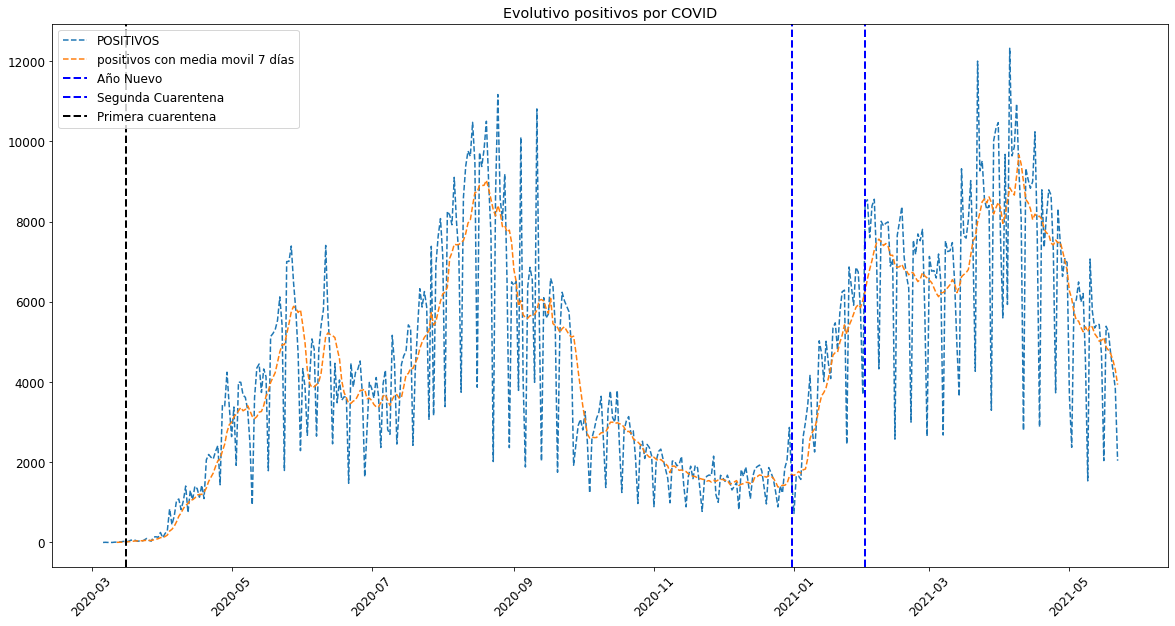

In [277]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})

x = POSITIVOS_DIA["DIA"]
y = POSITIVOS_DIA["POS_DIA"]
ts = pd.Series(y.values, index=x.values)
mean_smoothed=ts.rolling(window=7).mean()

plt.plot(x,y, label = "POSITIVOS",linestyle='dashed')
plt.plot(mean_smoothed, label = "positivos con media movil 7 días",linestyle='dashed')

plt.axvline(pd.to_datetime('2020-12-31'), color='b', linestyle='--', lw=2, label = "Año Nuevo")
plt.axvline(pd.to_datetime('2021-02-01'), color='b', linestyle='--', lw=2, label = "Segunda Cuarentena")
plt.axvline(pd.to_datetime('2020-03-16'), color='black', linestyle='--', lw=2, label = "Primera cuarentena")

plt.xticks(rotation=45)
plt.legend()
plt.title("Evolutivo positivos por COVID")
plt.show()


#### Evolución de fallecidos

In [233]:
df_fallecidos.head()

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,INDICADOR_FALLECIDOS
0,20210531,7320cabdc1aaca6c59014cae76a134e6,20200803,63.0,MASCULINO,Criterio SINADEF,150103.0,LIMA METROPOLITANA,LIMA,ATE,1
1,20210531,71ecb6bccb248b0bb2ac72ed51b5e979,20200804,63.0,MASCULINO,Criterio SINADEF,150125.0,LIMA METROPOLITANA,LIMA,PUENTE PIEDRA,1
2,20210531,027561e9d126e7c283d79c02cede562d,20200804,64.0,MASCULINO,Criterio SINADEF,150115.0,LIMA METROPOLITANA,LIMA,LA VICTORIA,1
3,20210531,f016889b9ba5bd95cf15d60205cbd82e,20200804,64.0,MASCULINO,Criterio SINADEF,150143.0,LIMA METROPOLITANA,LIMA,VILLA MARIA DEL TRIUNFO,1
4,20210531,971f8e1295583756d81fe42f3318488c,20200806,64.0,MASCULINO,Criterio SINADEF,150106.0,LIMA METROPOLITANA,LIMA,CARABAYLLO,1


In [234]:
df_fallecidos["FECHA_FALLECIMIENTO"] = df_fallecidos["FECHA_FALLECIMIENTO"].astype(int).astype(str)

df_fallecidos["FECHA"] =  pd.to_datetime( df_fallecidos["FECHA_FALLECIMIENTO"],
                                         format= '%Y%m%d', errors = "coerce")
df_fallecidos

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,INDICADOR_FALLECIDOS,FECHA
0,20210531,7320cabdc1aaca6c59014cae76a134e6,20200803,63.0,MASCULINO,Criterio SINADEF,150103.0,LIMA METROPOLITANA,LIMA,ATE,1,2020-08-03
1,20210531,71ecb6bccb248b0bb2ac72ed51b5e979,20200804,63.0,MASCULINO,Criterio SINADEF,150125.0,LIMA METROPOLITANA,LIMA,PUENTE PIEDRA,1,2020-08-04
2,20210531,027561e9d126e7c283d79c02cede562d,20200804,64.0,MASCULINO,Criterio SINADEF,150115.0,LIMA METROPOLITANA,LIMA,LA VICTORIA,1,2020-08-04
3,20210531,f016889b9ba5bd95cf15d60205cbd82e,20200804,64.0,MASCULINO,Criterio SINADEF,150143.0,LIMA METROPOLITANA,LIMA,VILLA MARIA DEL TRIUNFO,1,2020-08-04
4,20210531,971f8e1295583756d81fe42f3318488c,20200806,64.0,MASCULINO,Criterio SINADEF,150106.0,LIMA METROPOLITANA,LIMA,CARABAYLLO,1,2020-08-06
...,...,...,...,...,...,...,...,...,...,...,...,...
184502,20210531,0e6e21a463b2e6db129a1bbc03a30d04,20210519,77.0,MASCULINO,Criterio serologico,80108.0,CUSCO,CUSCO,WANCHAQ,1,2021-05-19
184503,20210531,ad5693c7455d451abe7483eba7b07528,20210519,75.0,FEMENINO,Criterio virologico,80601.0,CUSCO,CANCHIS,SICUANI,1,2021-05-19
184504,20210531,7c12a731a8fac4f171f20290bc23d4d9,20210519,86.0,FEMENINO,Criterio virologico,80608.0,CUSCO,CANCHIS,TINTA,1,2021-05-19
184505,20210531,2bfc2bc8584205ba0781073d9ec616f7,20210519,42.0,MASCULINO,Criterio virologico,80901.0,CUSCO,LA CONVENCION,SANTA ANA,1,2021-05-19


In [235]:
z=df_fallecidos.groupby(['FECHA'])['INDICADOR_FALLECIDOS'].sum()
FALLECIDOS_DIA=pd.DataFrame({'DIA':z.index, 'FALL_DIA':z.values})
FALLECIDOS_DIA

,DIA,FALL_DIA
0,2020-03-03,1
1,2020-03-07,1
2,2020-03-11,1
3,2020-03-14,2
4,2020-03-16,4
...,...,...
441,2021-05-27,439
442,2021-05-28,427
443,2021-05-29,409
444,2021-05-30,390


In [236]:
df_fallecidos.head()

,FECHA_CORTE,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,INDICADOR_FALLECIDOS,FECHA
0,20210531,7320cabdc1aaca6c59014cae76a134e6,20200803,63.0,MASCULINO,Criterio SINADEF,150103.0,LIMA METROPOLITANA,LIMA,ATE,1,2020-08-03
1,20210531,71ecb6bccb248b0bb2ac72ed51b5e979,20200804,63.0,MASCULINO,Criterio SINADEF,150125.0,LIMA METROPOLITANA,LIMA,PUENTE PIEDRA,1,2020-08-04
2,20210531,027561e9d126e7c283d79c02cede562d,20200804,64.0,MASCULINO,Criterio SINADEF,150115.0,LIMA METROPOLITANA,LIMA,LA VICTORIA,1,2020-08-04
3,20210531,f016889b9ba5bd95cf15d60205cbd82e,20200804,64.0,MASCULINO,Criterio SINADEF,150143.0,LIMA METROPOLITANA,LIMA,VILLA MARIA DEL TRIUNFO,1,2020-08-04
4,20210531,971f8e1295583756d81fe42f3318488c,20200806,64.0,MASCULINO,Criterio SINADEF,150106.0,LIMA METROPOLITANA,LIMA,CARABAYLLO,1,2020-08-06


In [237]:
FALLECIDOS_DIA.isnull().sum(axis = 0)

DIA         0
FALL_DIA    0
dtype: int64

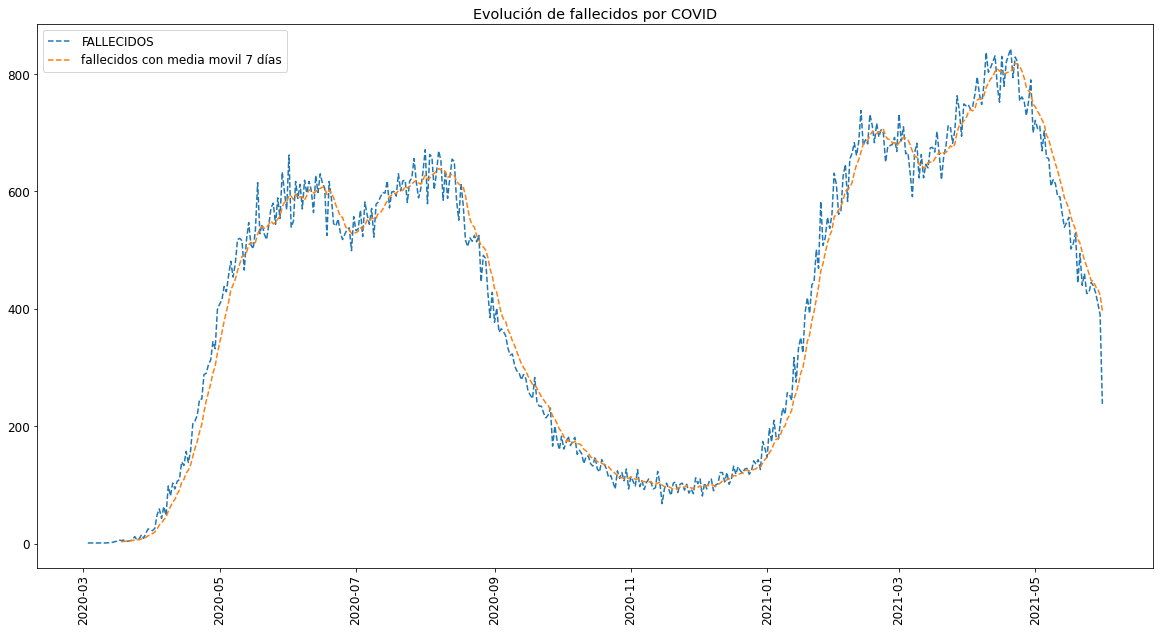

In [238]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})

x = FALLECIDOS_DIA["DIA"]
y = FALLECIDOS_DIA["FALL_DIA"]
ts = pd.Series(y.values, index=x.values)
mean_smoothed=ts.rolling(window=7).mean()

plt.plot(x,y, label = "FALLECIDOS",linestyle='dashed')
plt.plot(mean_smoothed, label = "fallecidos con media movil 7 días",linestyle='dashed')
plt.xticks(rotation=90)
plt.legend()
plt.title("Evolución de fallecidos por COVID")
plt.show()

#### Evolución de vacunados

In [239]:
df_vacunas

,FECHA_CORTE,UUID,GRUPO_RIESGO,EDAD,SEXO,FECHA_VACUNACION,DOSIS,DIRESA,DEPARTAMENTO,PROVINCIA,DISTRITO,INDICADOR_VACUNADOS,FABRICANTE_ASTRAZENECA,FABRICANTE_PFIZER,FABRICANTE_SINOPHARM
1234535,20210524,a362cd4ed2ff2cbf5e03472b18d5bfd0,PERSONAL DE SALUD,55.0,MASCULINO,20210209,1,AYACUCHO,AYACUCHO,HUAMANGA,AYACUCHO,1,0,0,1
1795869,20210524,47d7f2b1985ce08ea4065ed0405c9390,PERSONAL DE SALUD,52.0,MASCULINO,20210209,1,LIMA CENTRO,LIMA,LIMA,LIMA,1,0,0,1
124986,20210524,46865021b0c69f260a320b27480c9d20,PERSONAL DE SALUD,27.0,MASCULINO,20210209,1,LIMA CENTRO,LIMA,LIMA,LIMA,1,0,0,1
2205648,20210524,28bfd067a46cae2e9d50a371866cbb6d,PERSONAL DE SALUD,51.0,FEMENINO,20210209,1,LIMA CENTRO,LIMA,LIMA,LIMA,1,0,0,1
1795983,20210524,e4b2bbe4f0d202a441f6cb1339549370,PERSONAL DE SALUD,46.0,FEMENINO,20210209,1,LIMA CENTRO,LIMA,LIMA,BREÑA,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999112,20210524,81e3ddea89313b38d562630b0711d922,ADULTO MAYOR,68.0,FEMENINO,20210524,1,ICA,ICA,CHINCHA,PUEBLO NUEVO,1,0,1,0
926199,20210524,e96e04bb4c3581f129795ff978c17522,ADULTO MAYOR,66.0,MASCULINO,20210524,1,CALLAO,CALLAO,CALLAO,VENTANILLA,1,0,1,0
1999108,20210524,0607cc30a9a07169cc7d80222f3eef46,ADULTO MAYOR,65.0,MASCULINO,20210524,1,ICA,ICA,CHINCHA,PUEBLO NUEVO,1,0,1,0
1999123,20210524,836512e3213f61decaef2ca56f5038f8,ADULTO MAYOR,66.0,MASCULINO,20210524,1,ICA,ICA,CHINCHA,PUEBLO NUEVO,1,0,1,0


In [240]:
df_vacunas["FECHA_VACUNACION"] = df_vacunas["FECHA_VACUNACION"].astype(int).astype(str)
df_vacunas["FECHA"] =  pd.to_datetime( df_vacunas["FECHA_VACUNACION"],
                                         format= '%Y%m%d', errors = "coerce")

y=df_vacunas.groupby(['FECHA'])['INDICADOR_VACUNADOS'].sum()
VACUNADOS_DIA=pd.DataFrame({'DIA':y.index, 'VAC_DIA':y.values})
VACUNADOS_DIA

,DIA,VAC_DIA
0,2021-02-09,3842
1,2021-02-10,16586
2,2021-02-11,34126
3,2021-02-12,32301
4,2021-02-13,18814
...,...,...
100,2021-05-20,65661
101,2021-05-21,87501
102,2021-05-22,56495
103,2021-05-23,23295


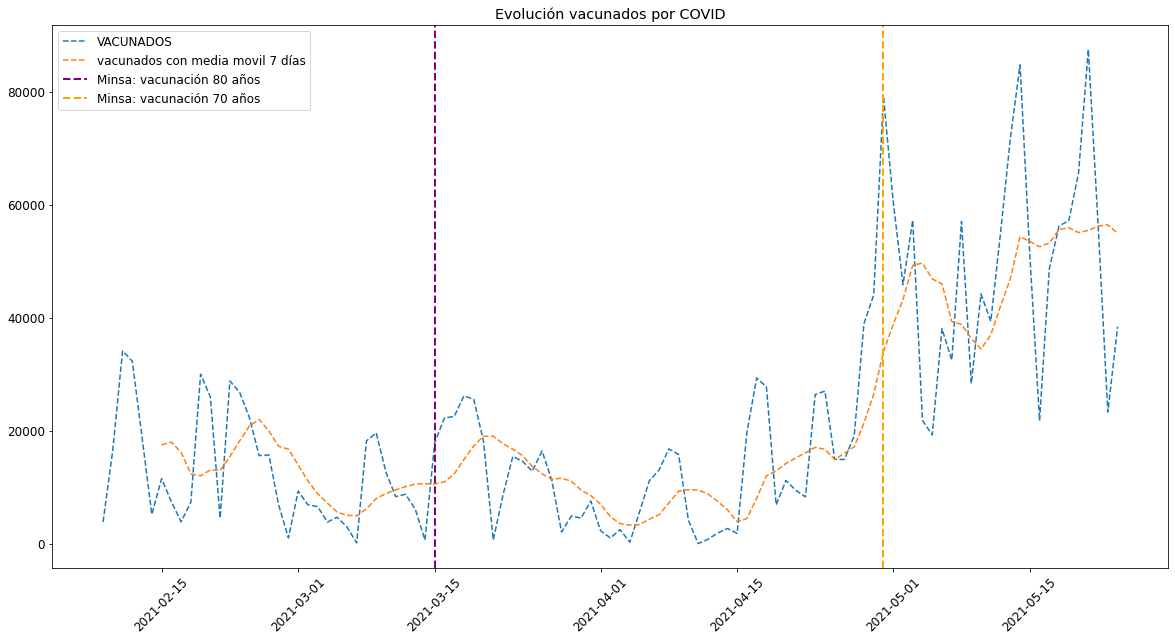

In [241]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})

x = VACUNADOS_DIA["DIA"]
y = VACUNADOS_DIA["VAC_DIA"]
ts = pd.Series(y.values, index=x.values)
mean_smoothed= ts.rolling(window=7).mean()

plt.plot(x,y, label = "VACUNADOS",linestyle='dashed')    
plt.plot(mean_smoothed, label = "vacunados con media movil 7 días",linestyle='dashed')
#rolling_mean1.plot(color='green')
plt.axvline(pd.to_datetime('2021-03-15'), color='purple', linestyle='--', lw=2, label = "Minsa: vacunación 80 años")
plt.axvline(pd.to_datetime('2021-04-30'), color='orange', linestyle='--', lw=2, label = "Minsa: vacunación 70 años")

plt.xticks(rotation=45)
plt.legend()
plt.title("Evolución vacunados por COVID")
plt.show()


#### Evolución de infectados y fallecidos

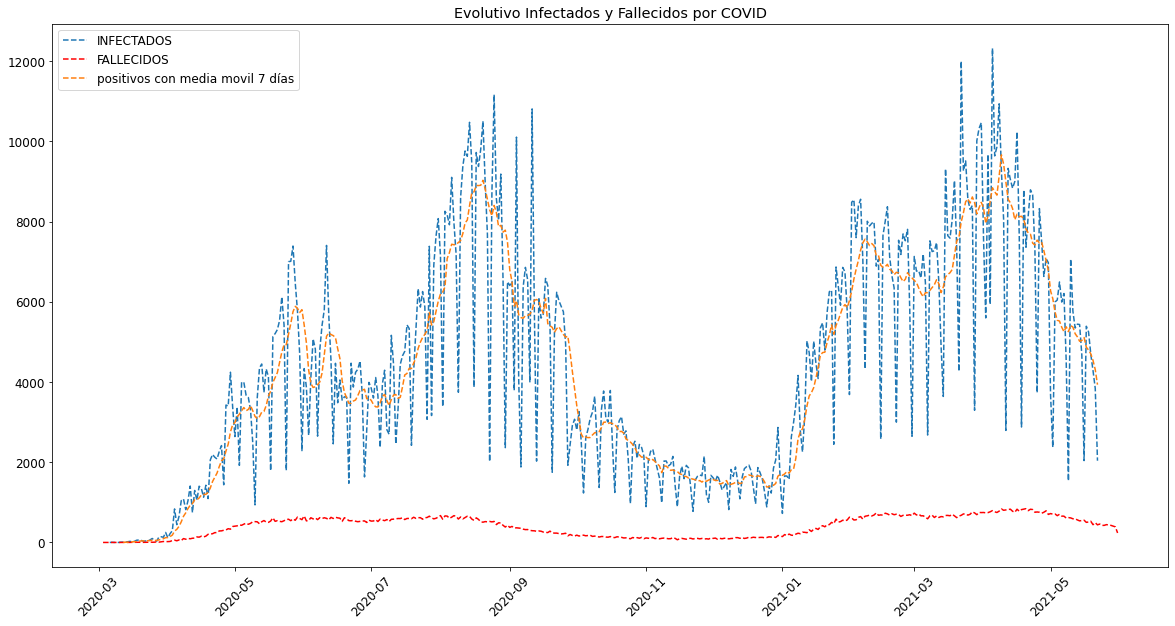

In [242]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})

x = POSITIVOS_DIA["DIA"]
y = POSITIVOS_DIA["POS_DIA"]
ts = pd.Series(y.values, index=x.values)
mean_smoothed=ts.rolling(window=7).mean()

a = FALLECIDOS_DIA["DIA"]
b = FALLECIDOS_DIA["FALL_DIA"]

plt.plot(x,y, label = "INFECTADOS",linestyle='dashed')
plt.plot(a,b, label = "FALLECIDOS",linestyle='dashed',color="red")
plt.plot(mean_smoothed, label = "positivos con media movil 7 días",linestyle='dashed')

plt.xticks(rotation=45)
plt.legend()
plt.title("Evolutivo Infectados y Fallecidos por COVID")
plt.show()

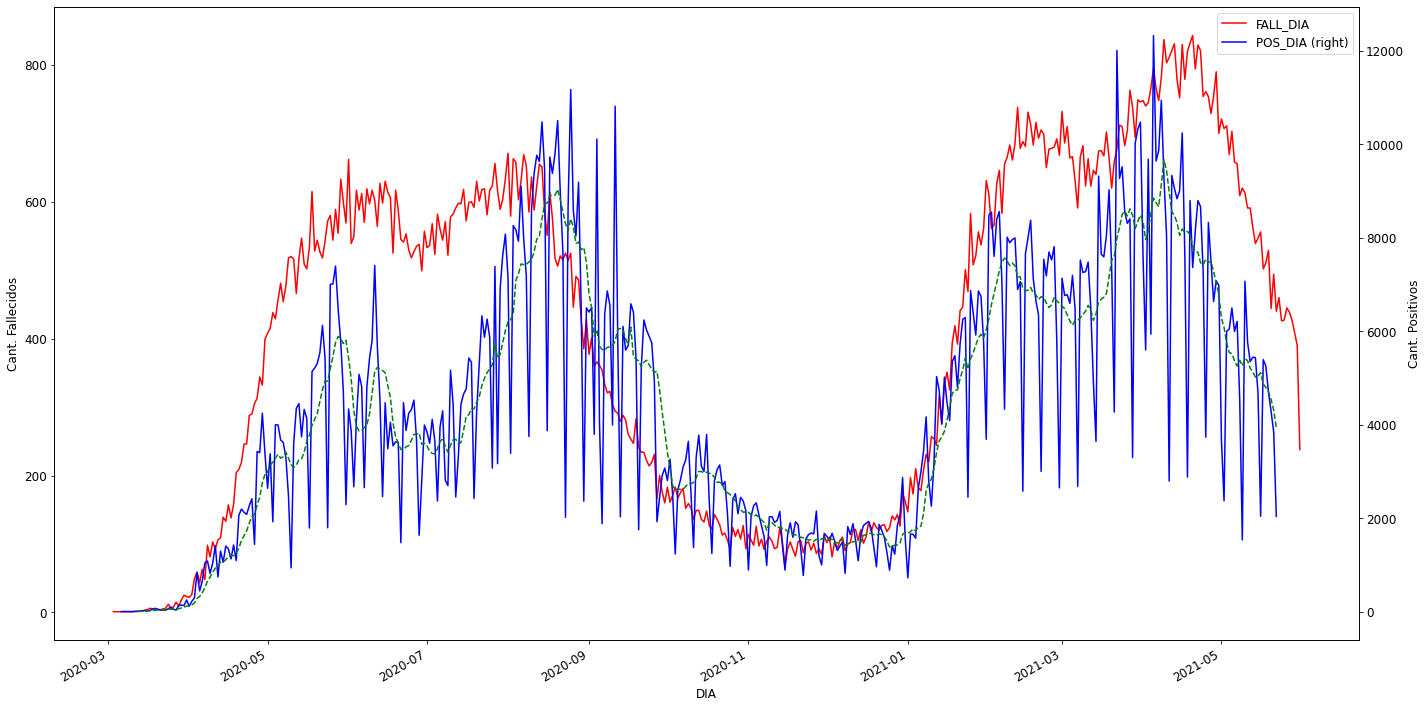

In [243]:
plt.rcParams['figure.figsize']= (20,10)
plt.rcParams.update({'font.size':12})
x = POSITIVOS_DIA["DIA"]
y = POSITIVOS_DIA["POS_DIA"]
ts = pd.Series(y.values, index=x.values)
mean_smoothed=ts.rolling(window=7).mean()

ax= FALLECIDOS_DIA.plot(kind='line',x='DIA',y='FALL_DIA',color='r')
ax2= POSITIVOS_DIA.plot(kind='line', x='DIA', y='POS_DIA', secondary_y=True, color='b',ax=ax)
plt.plot(mean_smoothed, label = "positivos con media movil 7 días",linestyle='dashed',color='green')

ax.set_ylabel('Cant. Fallecidos')
ax2.set_ylabel('Cant. Positivos')
plt.tight_layout()
plt.show()

Se puede observa una correlación positiva entre las variables de positivos y fallecidos

#### Evolución de infectados y vacunados

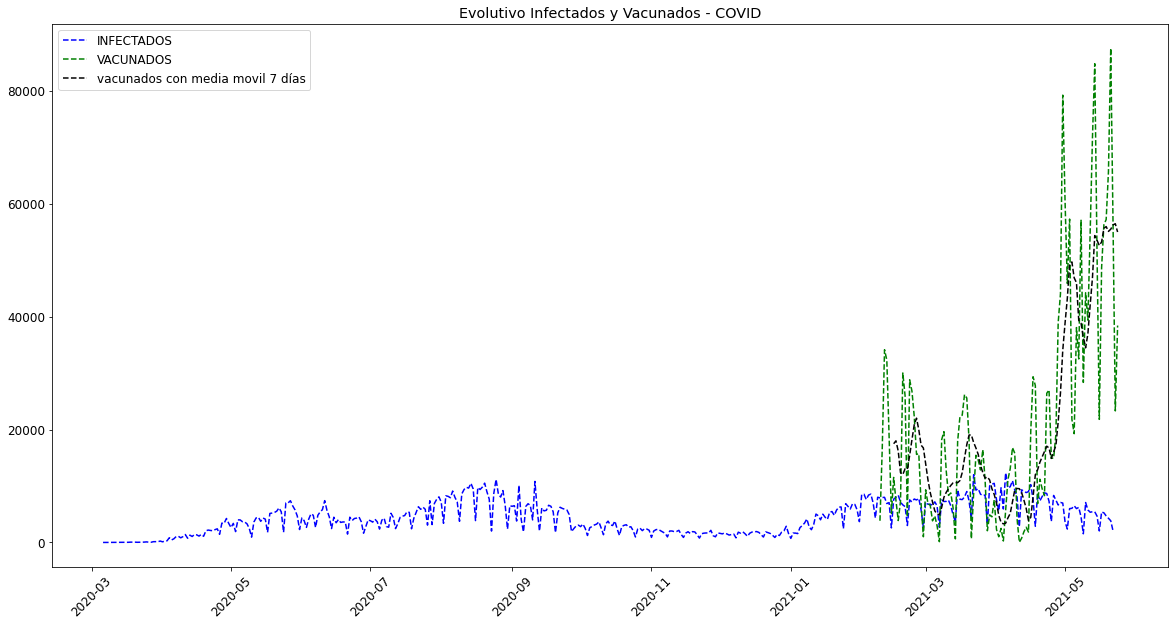

In [244]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 12})

x = POSITIVOS_DIA["DIA"]
y = POSITIVOS_DIA["POS_DIA"]
a = VACUNADOS_DIA["DIA"]
b = VACUNADOS_DIA["VAC_DIA"]
ts = pd.Series(b.values, index=a.values)
mean_smoothed=ts.rolling(window=7).mean()

plt.plot(x,y, label = "INFECTADOS",linestyle='dashed',color='blue')
plt.plot(a,b, label = "VACUNADOS",linestyle='dashed',color="green")
plt.plot(mean_smoothed, label = "vacunados con media movil 7 días",linestyle='dashed',color='k')
plt.xticks(rotation=45)
plt.legend()
plt.title("Evolutivo Infectados y Vacunados - COVID")
plt.show()

#### Población vacunada con primera y segunda dosis, por tipo de fabricante a nivel distrital

In [245]:
df_vacunas2=df_vacunas2.drop_duplicates('UUID',keep='last')
df_vacunas2.isnull().sum(axis=0)
# No hay nulos en dosis

FECHA_CORTE             0
UUID                    0
GRUPO_RIESGO            0
EDAD                73873
SEXO                    0
FECHA_VACUNACION        0
DOSIS                   0
FABRICANTE              0
DIRESA                  0
DEPARTAMENTO            0
PROVINCIA               0
DISTRITO                0
dtype: int64

In [246]:
df_vacunas2['DOSIS'].value_counts()

1    1277464
2    1000533
Name: DOSIS, dtype: int64

In [247]:
df_vacunas2["DOSIS_2"] = df_vacunas2.apply(lambda x: 1 if x["DOSIS"]== 2 else 0 ,axis = 1 )

In [248]:
#df_vacunas2['FABRICANTE'].value_counts()
#df_vacunas2['DOSIS_1'].value_counts()
#df_vacunas2['DOSIS_2'].value_counts()

In [249]:
df_vacunas2["SINOPHARM"] = df_vacunas2.apply(lambda x: 1 if x["FABRICANTE"]== "SINOPHARM" else 0 ,axis = 1 )
df_vacunas2["PFIZER"] = df_vacunas2.apply(lambda x: 1 if x["FABRICANTE"]== "PFIZER" else 0 ,axis = 1 )
df_vacunas2["ASTRAZENECA"] = df_vacunas2.apply(lambda x: 1 if x["FABRICANTE"]== "ASTRAZENECA" else 0 ,axis = 1 )

In [250]:
def plot_vacunados(df_vacunas2,departamento, provincia, distrito):
    condicion = (df_vacunas2["DEPARTAMENTO"] == departamento ) & (df_vacunas2["PROVINCIA"] == provincia ) & (df_vacunas2['DOSIS_2']==1) & (df_vacunas2["DISTRITO"] == distrito )
    df__vacunas3 = df_vacunas2[ condicion ]
    
    df__vacunas3 = df__vacunas3.groupby(['FECHA_VACUNACION']).agg( 
    {'SINOPHARM':['sum'],'PFIZER':['sum'],'ASTRAZENECA':['sum']} ).reset_index()
    df__vacunas3["FECHA_VACUNACION"] =  pd.to_datetime( df__vacunas3["FECHA_VACUNACION"],
                                         format= '%Y%m%d', errors = "coerce")

    df__vacunas3.columns = ["FECHA_VACUNACION","SINOPHARM","PFIZER","ASTRAZENECA"]
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams.update({'font.size': 12})

    x = df__vacunas3["FECHA_VACUNACION"]
    y = df__vacunas3["SINOPHARM"]
    a = df__vacunas3["FECHA_VACUNACION"]
    b = df__vacunas3["PFIZER"]
    c = df__vacunas3["FECHA_VACUNACION"]
    d = df__vacunas3["ASTRAZENECA"]
    #ts = pd.Series(b.values, index=a.values)
    #mean_smoothed=ts.rolling(window=7).mean()

    plt.plot(x,y, label = "SINOPHARM",linestyle='dashed',color='blue')
    plt.plot(a,b, label = "PFIZER",linestyle='dashed',color='green')
    plt.plot(c,d, label = "ASTRAZENECA",linestyle='dashed',color='r')
    #plt.plot(mean_smoothed, label = "vacunados con media movil 7 días",linestyle='dashed',color='k')
    plt.xticks(rotation=45)
    plt.legend()
    plt.title("Evolución vacunas "+ departamento+'-'+provincia+'-'+distrito)
    plt.show()

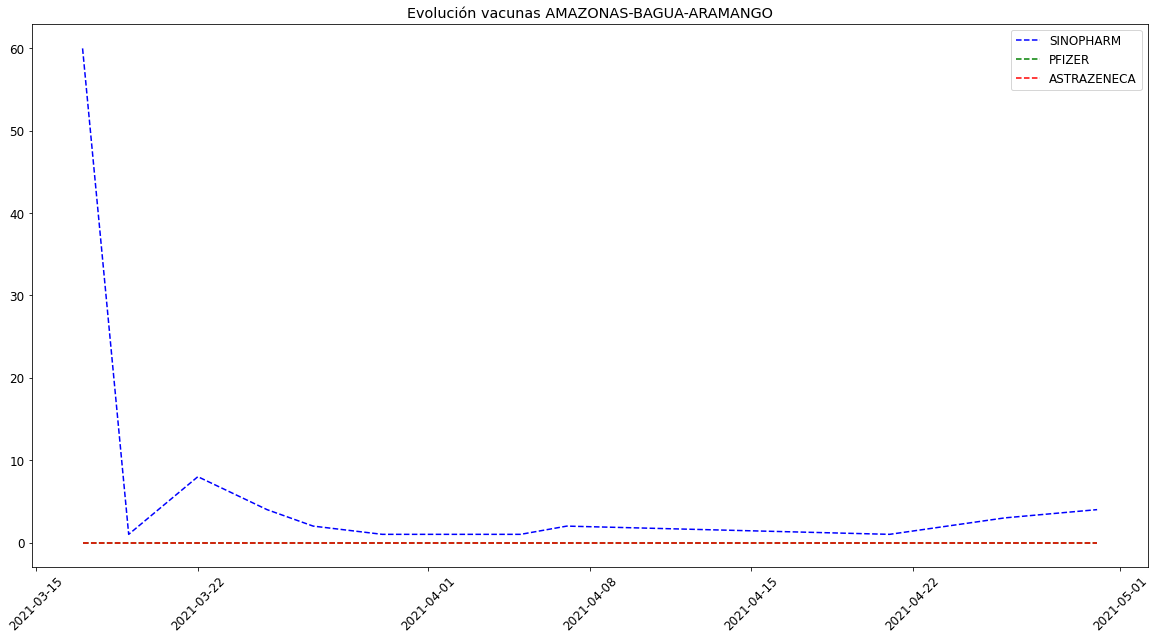

In [251]:
plot_vacunados(df_vacunas2,"AMAZONAS", "BAGUA", "ARAMANGO")

Se ha creado una función para que se ingrese el departamento, provincia y distrito de preferencia, de esta manera se obtiene una gráfica que muestra la evolución de los vacunados por tipo de vacuna. En general, se observa que la vacuna Sinopharm es la que más se aplicado a la población en comparación a la demás durante el periodo dado.

#### PREGUNTA 3.7

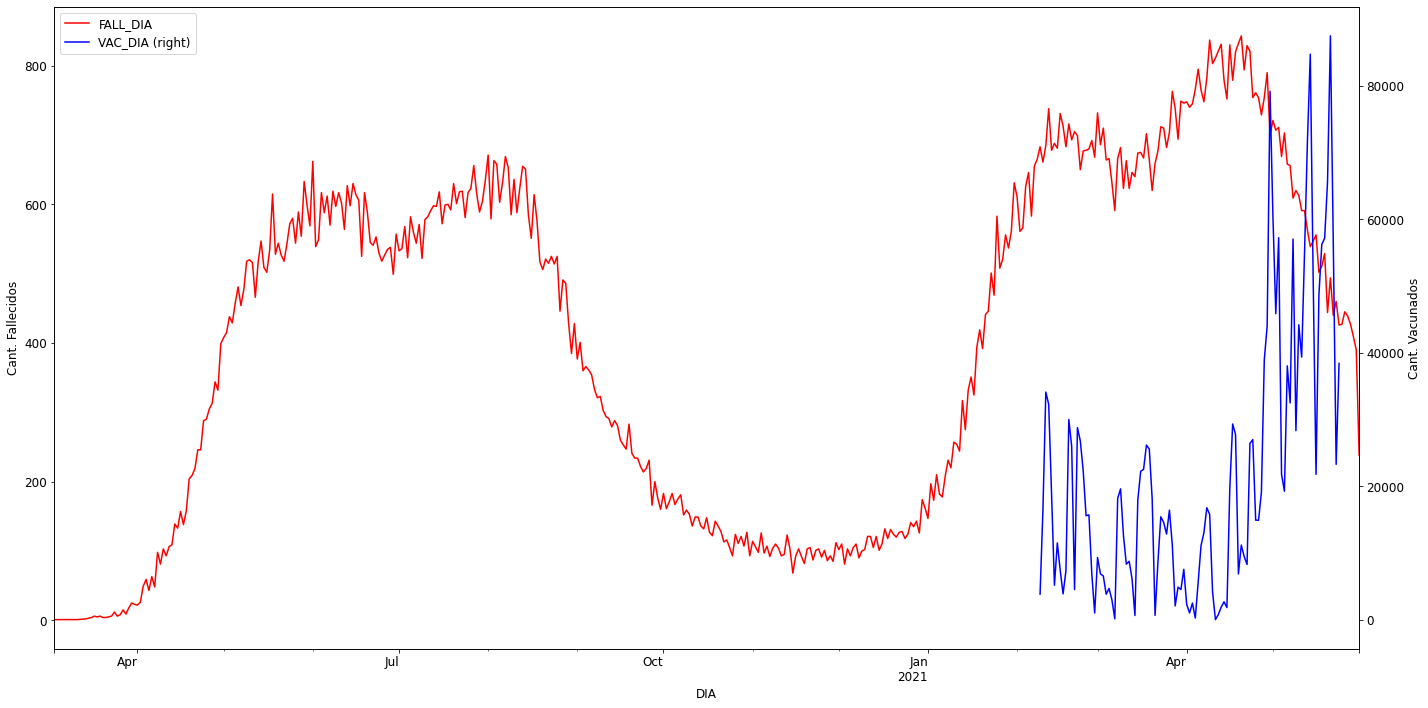

In [252]:
plt.rcParams['figure.figsize']= (20,10)
plt.rcParams.update({'font.size':12})

ax= FALLECIDOS_DIA.plot(kind='line',x='DIA',y='FALL_DIA',color='r')
ax2= VACUNADOS_DIA.plot(kind='line', x='DIA', y='VAC_DIA', secondary_y=True, color='b',ax=ax)

ax.set_ylabel('Cant. Fallecidos')
ax2.set_ylabel('Cant. Vacunados')
plt.tight_layout()
plt.show()

El periodo de tiempo es corto y se debe considerar que los efectos de la vacunación en la cantidad de infectados y número de fallecidos se verá después en un par de semanas. De acuerdo a la muestra, se observa que a partir de abril del 2021 la curva de fallecidos va descendiendo, mientras que la curva de vacunación tiene una tendencia creciente a partir de esa fecha. 

#### Mapa de calor de los vacunados a nivel distrital

In [253]:
dataCruce10['vacunados']=dataCruce10['Cantidad_vacunados']/dataCruce10['POBLACION']
dataCruce10['vacunados']=dataCruce10['vacunados']*100

In [254]:
#dataCruce4['vacunados'].fillna(0, inplace = True)
dataCruce10["vacunados"]= dataCruce10["vacunados"].fillna(0)

In [255]:
# dataCruce5 = dataCruce4.dropna(subset=['vacunados'])
dataCruce10.head()

,Código,Código.1,DEPARTAMENTO,PROVINCIA,DISTRITO,POBLACION,Cantidad_vacunados,vacunados
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,32589.0,6047.0,18.555341
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,262.0,42.0,16.030534
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,1136.0,51.0,4.489437
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,642.0,43.0,6.697819
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,585.0,62.0,10.598291


In [256]:
dataCruce10["vacunados"].max()

260.3558241020477

In [257]:
dataCruce10.shape

(1874, 8)

In [258]:
dataCruce10['vacunados'].describe()

count    1874.000000
mean        4.518594
std         9.254502
min         0.000000
25%         0.466905
50%         1.548354
75%         6.776048
max       260.355824
Name: vacunados, dtype: float64

In [259]:
dataCruce10['vacunados'].value_counts()

0.000000    233
1.415094      2
0.288600      2
0.362319      2
0.674764      2
           ... 
3.208769      1
3.276255      1
0.361446      1
3.994954      1
0.865333      1
Name: vacunados, Length: 1630, dtype: int64

In [260]:
dataCruce10.isnull().sum(axis = 0)

Código                  0
Código.1                0
DEPARTAMENTO            0
PROVINCIA               0
DISTRITO                0
POBLACION               0
Cantidad_vacunados    233
vacunados               0
dtype: int64

In [261]:
DATAMAP = DBF('LIMITE_DISTRITAL_2020_INEI_geogpsperu_juansuyo_931381206.dbf', load=True,encoding='latin1')

In [262]:
sf=shp.Reader("LIMITE_DISTRITAL_2020_INEI_geogpsperu_juansuyo_931381206.shp")

In [263]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [264]:
DATASHAPE=read_shapefile(sf)
DATASHAPE.shape

(1874, 16)

In [265]:
DATASHAPE.head()

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,coords
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-78.91577661290034, -7.320853224796451), (-7..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-79.01679298780613, -6.969453099780708), (-7..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-79.21691373757886, -6.85171085017555), (-79..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-79.08233123839591, -7.005439350045947), (-7..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"[(-78.87623048804653, -7.097466725009326), (-7..."


In [266]:
def inverserange(x=int):
    lista = []
    while x >= 1:
        x -= 1
        lista += [x]
    return lista;

In [267]:
inverserange(6)

[5, 4, 3, 2, 1, 0]

In [268]:
def calc_color(data, color=None): #calculadora de color
        if color==1: color_sq=['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq=['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494'];colors='YlGnBu';
        elif color == 3: color_sq =['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525'];colors = 'Greys';
        elif color == 9: color_sq =['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq =['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404'];colors ='YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, #se parte en 6 categorás
        labels= inverserange(6))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [269]:
def plot_map_fill_multiples_ids_tone(sf, title, ciudad,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    La función se redefine para poder tener un Heatmap o mapa de calor
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for id in ciudad:
        #print(id)
        shape_ex = sf.shape(id)
        DIST=sf.record(id)['NOMBDIST']

        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[ciudad.index(id)])
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        #plt.text(x0, y0, DIST, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [270]:
def plot_ciudades_data(sf, title, ciudades, data=None, 
                      color=None, print_id=False,figsize=(11,20)):
    '''
    Se dibuja el mapa con los distritos indicados
    '''
    
    color_ton, bins = calc_color(data, color)
    plot_map_fill_multiples_ids_tone(sf, title, ciudades, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = figsize);

In [271]:
data=dataCruce10.vacunados

In [272]:
data

0       18.555341
1       16.030534
2        4.489437
3        6.697819
4       10.598291
          ...    
1869     3.935774
1870     4.286454
1871     4.569397
1872     0.000000
1873     1.853147
Name: vacunados, Length: 1874, dtype: float64

In [273]:
#VACUNADOS_DIA.isnull().sum(axis = 0)

In [274]:
DISTPERUidx=list(DATASHAPE.NOMBDIST.index)
#for i in range(len(DISTPERUidx)):
    #DISTPERUidx[i] = int(DISTPERUidx[i])
# data=RESULTADOS_DIST.VOTOS
DISTPERUidx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [275]:
DATASHAPE.shape

(1874, 16)


1: 0 => -1 
2: 0 => -1 
3: 0 => 0 
4: 1 => 3 
5: 4 => 7 
6: 8 => 259 

   1   2   3   4   5   6


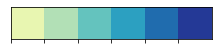

<Figure size 1080x1440 with 0 Axes>

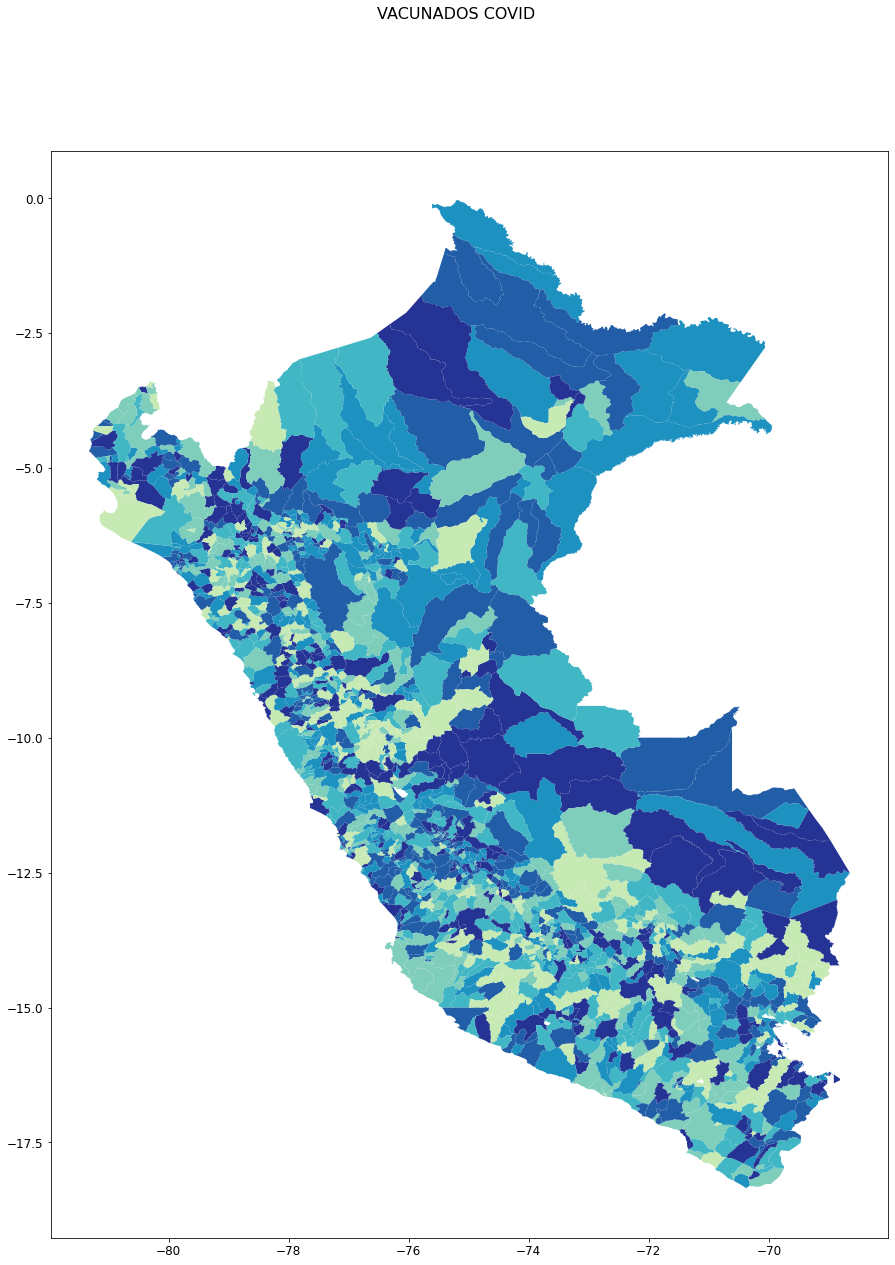

In [276]:
color_pallete = 2 
plot_ciudades_data(sf,'VACUNADOS COVID', DISTPERUidx, data=data,color=color_pallete, print_id=False,figsize=(15,20))

#### Comentarios

En el cálculo de los porcentajes de vacunados por distrito, se han encontrado irregularidades, ya que se observa que el máximo porcentaje de vacunados es de aproximadamente de 260%, lo cual se puede deber quizás a la falta de establecimiento médicos para aplicar las vacunas en algunas partes del Perú. Debido a esto, puede ser que algunos distritos apliquen una mayor cantidad de vacunas en comparación al número de residentes del distrito. Por otro lado, la información obtenida y la evolución de la misma NO NOS INDICA QUE VACUNA ES MEJOR, ya que, en este caso, la Sinopharm es la que presenta mayor participación dentro de las vacunas; sin embargo, esto se debe a que fue la primera en obtenerse y al periodo de tiempo de la muestra. Actualmente, la vacuna que tiene mayor participación es la Pfizer. La aplicación de una u otra vacuna no tiene nada que ver con la efectividad de las mismas, sino depende del orden de llegada y la compra de lotes. En estas circunstancias, la mejor vacuna es la que llega primero y con los permisos respectivos aprobados claro está.  